In [95]:
"""
maximum availible volume to pool into
"""
max_volume=500

"""
maximum availible volume to be taken out of well
"""
max_oligo_volume=80

"""
maximum availible volume to be taken out of well
"""
min_oligo_volume=5

# """
# target moles of oligo pmol
# """
# target_quantity=90

In [96]:
# !pip install google-colab


In [97]:
EXPERIMENT_NAME = "N4-1A"
# reading file
import pandas as pd
df_calculated =  pd.read_csv(f'./content/{EXPERIMENT_NAME}_calculated.csv', delimiter='\t', decimal=".")

df = pd.read_csv(f'./content/{EXPERIMENT_NAME}_concentrations.csv', delimiter='\t', decimal=".")

"""
strip the text everywhere on data frame
"""
cols = df.select_dtypes(object).columns
df[cols] = df[cols].apply(lambda x: x.str.strip())
"""
and again
"""
cols = df_calculated.select_dtypes(object).columns
df_calculated[cols] = df_calculated[cols].apply(lambda x: x.str.strip())

"""
now merge cleaned dataframes
"""
merge = df.merge(df_calculated, on='where')
df = merge

df.to_csv(f'./content/{EXPERIMENT_NAME}_merged_input.csv', encoding='UTF8')

In [98]:
df['Nucleic Acid(ng/uL)']

0     400.464
1     415.572
2     382.936
3     318.820
4     386.471
5     257.698
6     413.148
7     424.994
8     469.346
9     305.865
10    410.984
11    382.659
12    343.386
13    402.163
14    295.232
15    396.857
16    324.842
17    388.981
18    367.603
19    383.636
20    355.075
21    354.961
22    404.002
23    409.880
24    376.996
25    341.262
26    407.554
27    448.177
28    298.796
29    291.653
30    355.598
31    369.134
32    357.202
33    371.712
34    362.467
35    286.497
36    304.593
37    434.486
38    376.960
39    347.377
40    410.502
41    374.185
42    387.196
43    321.281
44    415.429
45    276.573
Name: Nucleic Acid(ng/uL), dtype: float64

In [99]:
# df['Nucleic Acid(ng/uL)'] = df['Nucleic Acid(ng/uL)'].str.replace(',','.').astype(float)
df['monoisotopic_mass'] = df['monoisotopic_mass'].astype(float)
df["pM/mkl"] = 1000*df['Nucleic Acid(ng/uL)']/df['monoisotopic_mass']
df=df.dropna()

# if target_quantity/min(df["pM/mkl"]) > 70:
#   print("ATTENTION! target quantity cannot be achieved - oligo concentration is too low!")
#   target_quantity=min(df["pM/mkl"])*30
#   print(f"target_quantity is set to {target_quantity:.2f} pmol instead.")

# df['mkl']=target_quantity/df["pM/mkl"]

# # if sum(df['mkl']) > 500 mkl:
# # if min(df['mkl']) < 0.2 mkl:

# df = df[df['seq'].notna()]
# volume_list = df['mkl'].to_list()

df

,where,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A260,A280,Nucleic Acid Factor,Baseline Correction (nm),Baseline Absorbance,code,length,seq,monoisotopic_mass,pM/mkl
0,A7,06.12.2023 9:57,Sample 1,400.464,2.013,1.519,12.135,6.028,33.0,340,0.027,VibriophageN4_F3-1,#= 50,CTG ATA AAC CAC AAG ATA TCT ATG GTA TCG TTG CT...,15496.00,25.843056
1,B7,06.12.2023 9:57,Sample 2,415.572,1.815,1.101,12.593,6.939,33.0,340,0.021,VibriophageN4_F3-2,#= 58,CGT CTT CTG TAC CGC TAA TCA CAA GGT CAC GTA GT...,17631.34,23.570075
2,C7,06.12.2023 9:58,Sample 3,382.936,2.130,1.130,11.604,5.447,33.0,340,0.042,VibriophageN4_F3-3,#= 44,GAT TAG CGG TAC AGA AGA CGA GAT GCA AAC TCT CG...,13664.85,28.023432
3,D7,06.12.2023 9:59,Sample 4,318.820,1.703,1.471,9.661,5.672,33.0,340,0.005,VibriophageN4_F3-4,#= 45,AGA CGT TCA GTG ATT TCA CCA GTC TTC TTG TCT TC...,13798.86,23.104807
4,E7,06.12.2023 9:59,Sample 5,386.471,1.744,1.496,11.711,6.715,33.0,340,0.031,VibriophageN4_F3-5,#= 58,GGT GAA ATC ACT GAA CGT CTT GTG CTT GGT ACT CG...,17885.45,21.608123
5,F7,06.12.2023 10:00,Sample 6,257.698,1.927,1.308,7.809,4.053,33.0,340,0.004,VibriophageN4_F3-6,#= 45,AGT TAC TGA GCG AGT CAC ACC ATA TTC TAA CCA TT...,13797.90,18.676610
6,G7,06.12.2023 10:01,Sample 7,413.148,1.825,1.408,12.520,6.859,33.0,340,-0.004,VibriophageN4_F3-7,#= 54,TGT GAC TCG CTC AGT AAC TAA ACG CTC AGT TAT GA...,16561.64,24.946080
7,H7,06.12.2023 10:02,Sample 8,424.994,1.965,1.251,12.879,6.554,33.0,340,0.004,VibriophageN4_F3-8,#= 49,CAA ACA CTT GGT CAG CAA AGC CAT ACT CTT TAG AG...,15026.70,28.282590
8,I7,06.12.2023 10:02,Sample 9,469.346,1.913,1.413,14.223,7.436,33.0,340,0.480,VibriophageN4_F3-9,#= 54,CTT TGC TGA CCA AGT GTT TGA AGA TAC TGT GAT GC...,16659.72,28.172502
9,J7,06.12.2023 10:03,Sample 10,305.865,1.751,1.369,9.269,5.292,33.0,340,-0.032,VibriophageN4_F3-10,#= 38,CTC AGT GAA CAT TGC ACC TTT GCC ATT GTC GAT AG...,11619.48,26.323467


In [100]:
# df = pd.read_csv(f'./content/{EXPERIMENT_NAME}_concentrations.csv', delimiter=';', decimal=".")
# df.columns = df.columns.str.strip()
# df_calculated["where"] = df_calculated["where"].str.strip()
# merge = df.merge(df_calculated, on='where')
# merge

In [101]:
# df_calculated.tail(3)

In [102]:
# pd.merge(left=df_calculated, right=df, how='inner', on='where')

In [103]:
# df[df["where"].isin(df_calculated['where'])]

In [104]:
# pd.set_option('max.rows', 500)

In [105]:
# df_calculated.columns

In [106]:
# df_calculated.loc[269, 'where']

In [107]:
# df.loc[16, 'where']

In [108]:
# for elem in df_calculated["where"].unique():
#     print(repr(elem))

<font color='red'>NOTICE ME</font>

Bad data with space `^`

Чтобы такого избежать, лучше при чтении таблиц указывать тип данных для каждого из столбцов (если заранее известно их чисо и тд)

---

In [109]:
# df = pd.read_csv(f'./content/{EXPERIMENT_NAME}_concentrations.csv', delimiter=';', decimal=".")
# merge = df.merge(df_calculated, on='where')
# merge

In [110]:
# df_calculated.merge(df, on="where")

In [111]:
# df_calculated.head(3)

In [112]:
df

,where,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A260,A280,Nucleic Acid Factor,Baseline Correction (nm),Baseline Absorbance,code,length,seq,monoisotopic_mass,pM/mkl
0,A7,06.12.2023 9:57,Sample 1,400.464,2.013,1.519,12.135,6.028,33.0,340,0.027,VibriophageN4_F3-1,#= 50,CTG ATA AAC CAC AAG ATA TCT ATG GTA TCG TTG CT...,15496.00,25.843056
1,B7,06.12.2023 9:57,Sample 2,415.572,1.815,1.101,12.593,6.939,33.0,340,0.021,VibriophageN4_F3-2,#= 58,CGT CTT CTG TAC CGC TAA TCA CAA GGT CAC GTA GT...,17631.34,23.570075
2,C7,06.12.2023 9:58,Sample 3,382.936,2.130,1.130,11.604,5.447,33.0,340,0.042,VibriophageN4_F3-3,#= 44,GAT TAG CGG TAC AGA AGA CGA GAT GCA AAC TCT CG...,13664.85,28.023432
3,D7,06.12.2023 9:59,Sample 4,318.820,1.703,1.471,9.661,5.672,33.0,340,0.005,VibriophageN4_F3-4,#= 45,AGA CGT TCA GTG ATT TCA CCA GTC TTC TTG TCT TC...,13798.86,23.104807
4,E7,06.12.2023 9:59,Sample 5,386.471,1.744,1.496,11.711,6.715,33.0,340,0.031,VibriophageN4_F3-5,#= 58,GGT GAA ATC ACT GAA CGT CTT GTG CTT GGT ACT CG...,17885.45,21.608123
5,F7,06.12.2023 10:00,Sample 6,257.698,1.927,1.308,7.809,4.053,33.0,340,0.004,VibriophageN4_F3-6,#= 45,AGT TAC TGA GCG AGT CAC ACC ATA TTC TAA CCA TT...,13797.90,18.676610
6,G7,06.12.2023 10:01,Sample 7,413.148,1.825,1.408,12.520,6.859,33.0,340,-0.004,VibriophageN4_F3-7,#= 54,TGT GAC TCG CTC AGT AAC TAA ACG CTC AGT TAT GA...,16561.64,24.946080
7,H7,06.12.2023 10:02,Sample 8,424.994,1.965,1.251,12.879,6.554,33.0,340,0.004,VibriophageN4_F3-8,#= 49,CAA ACA CTT GGT CAG CAA AGC CAT ACT CTT TAG AG...,15026.70,28.282590
8,I7,06.12.2023 10:02,Sample 9,469.346,1.913,1.413,14.223,7.436,33.0,340,0.480,VibriophageN4_F3-9,#= 54,CTT TGC TGA CCA AGT GTT TGA AGA TAC TGT GAT GC...,16659.72,28.172502
9,J7,06.12.2023 10:03,Sample 10,305.865,1.751,1.369,9.269,5.292,33.0,340,-0.032,VibriophageN4_F3-10,#= 38,CTC AGT GAA CAT TGC ACC TTT GCC ATT GTC GAT AG...,11619.48,26.323467


In [113]:
# pool_1 = "TdT-"
# pool_2 = "p03_F2-"
# pool_3 = "p10_F1-"
# pool_4 = "p10_F2-"
pool_1 = "VibriophageN4_F3-"
# pool_2 = "Unnamedsequence_F2-"
# pool_3 = "Unnamedsequence_F3-"


POOL_NAME=pool_1

df = df[df["code"].str.contains(f'^{POOL_NAME}\d+')]
df

,where,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A260,A280,Nucleic Acid Factor,Baseline Correction (nm),Baseline Absorbance,code,length,seq,monoisotopic_mass,pM/mkl
0,A7,06.12.2023 9:57,Sample 1,400.464,2.013,1.519,12.135,6.028,33.0,340,0.027,VibriophageN4_F3-1,#= 50,CTG ATA AAC CAC AAG ATA TCT ATG GTA TCG TTG CT...,15496.00,25.843056
1,B7,06.12.2023 9:57,Sample 2,415.572,1.815,1.101,12.593,6.939,33.0,340,0.021,VibriophageN4_F3-2,#= 58,CGT CTT CTG TAC CGC TAA TCA CAA GGT CAC GTA GT...,17631.34,23.570075
2,C7,06.12.2023 9:58,Sample 3,382.936,2.130,1.130,11.604,5.447,33.0,340,0.042,VibriophageN4_F3-3,#= 44,GAT TAG CGG TAC AGA AGA CGA GAT GCA AAC TCT CG...,13664.85,28.023432
3,D7,06.12.2023 9:59,Sample 4,318.820,1.703,1.471,9.661,5.672,33.0,340,0.005,VibriophageN4_F3-4,#= 45,AGA CGT TCA GTG ATT TCA CCA GTC TTC TTG TCT TC...,13798.86,23.104807
4,E7,06.12.2023 9:59,Sample 5,386.471,1.744,1.496,11.711,6.715,33.0,340,0.031,VibriophageN4_F3-5,#= 58,GGT GAA ATC ACT GAA CGT CTT GTG CTT GGT ACT CG...,17885.45,21.608123
5,F7,06.12.2023 10:00,Sample 6,257.698,1.927,1.308,7.809,4.053,33.0,340,0.004,VibriophageN4_F3-6,#= 45,AGT TAC TGA GCG AGT CAC ACC ATA TTC TAA CCA TT...,13797.90,18.676610
6,G7,06.12.2023 10:01,Sample 7,413.148,1.825,1.408,12.520,6.859,33.0,340,-0.004,VibriophageN4_F3-7,#= 54,TGT GAC TCG CTC AGT AAC TAA ACG CTC AGT TAT GA...,16561.64,24.946080
7,H7,06.12.2023 10:02,Sample 8,424.994,1.965,1.251,12.879,6.554,33.0,340,0.004,VibriophageN4_F3-8,#= 49,CAA ACA CTT GGT CAG CAA AGC CAT ACT CTT TAG AG...,15026.70,28.282590
8,I7,06.12.2023 10:02,Sample 9,469.346,1.913,1.413,14.223,7.436,33.0,340,0.480,VibriophageN4_F3-9,#= 54,CTT TGC TGA CCA AGT GTT TGA AGA TAC TGT GAT GC...,16659.72,28.172502
9,J7,06.12.2023 10:03,Sample 10,305.865,1.751,1.369,9.269,5.292,33.0,340,-0.032,VibriophageN4_F3-10,#= 38,CTC AGT GAA CAT TGC ACC TTT GCC ATT GTC GAT AG...,11619.48,26.323467


Text(0, 0.5, 'occurencies')

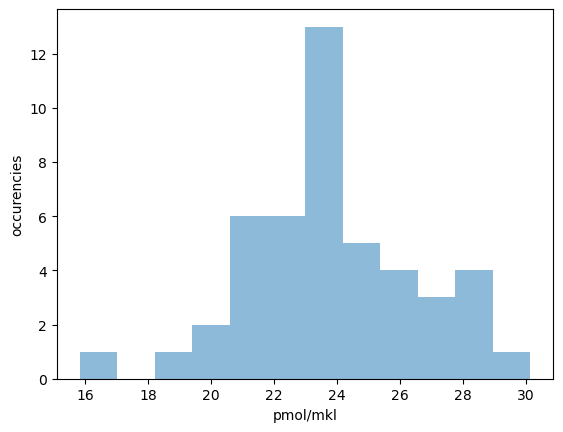

In [114]:
"""
смотрим распределение по корзинам
"""
ax = df['pM/mkl'].plot.hist(bins=12, alpha=0.5)
ax.set_xlabel("pmol/mkl")
ax.set_ylabel("occurencies")

In [115]:
'''
определяем выбросы
'''
import pandas
import numpy as np
from scipy import stats

# %reload_ext google.colab.data_table

df['score'] = np.abs(stats.zscore(df['pM/mkl']))<1.8
# df[(np.abs(stats.zscore(df)) < 1.5).all(axis=1)]
filtered, filtered_off = (df[(np.abs(stats.zscore(df['pM/mkl'])) < 1.8)], df[(np.abs(stats.zscore(df['pM/mkl'])) >= 1.8)])
filtered_off

,where,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A260,A280,Nucleic Acid Factor,Baseline Correction (nm),Baseline Absorbance,code,length,seq,monoisotopic_mass,pM/mkl,score
5,F7,06.12.2023 10:00,Sample 6,257.698,1.927,1.308,7.809,4.053,33.0,340,0.004,VibriophageN4_F3-6,#= 45,AGT TAC TGA GCG AGT CAC ACC ATA TTC TAA CCA TT...,13797.90,18.676610,False
35,D9,06.12.2023 10:25,Sample 36,286.497,2.025,1.090,8.682,4.286,33.0,340,0.097,VibriophageN4_F3-36,#= 58,GTG TGG GTT AAT TCA GGA GGG AGG CGC TCA GAT AT...,18098.64,15.829753,False
42,K9,06.12.2023 10:29,Sample 43,387.196,1.866,1.271,11.733,6.289,33.0,340,0.058,VibriophageN4_F3-43,#= 42,CTT AGT GAT TAC ACC GAC CGC TGA TAT CCA AGG TA...,12842.28,30.150098,False


Text(0, 0.5, 'occurencies')

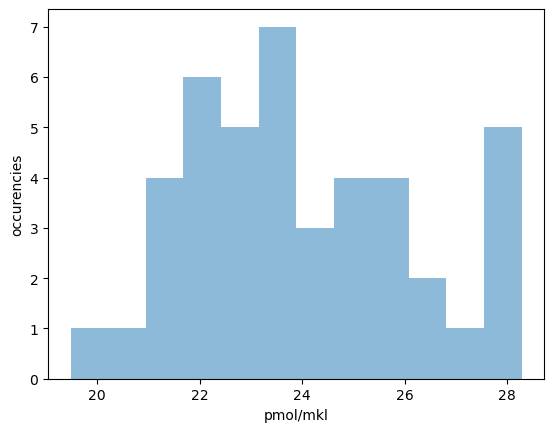

In [116]:
"""
смотрим распределение по корзинам
"""
ax = filtered['pM/mkl'].plot.hist(bins=12, alpha=0.5)
ax.set_xlabel("pmol/mkl")
ax.set_ylabel("occurencies")

In [117]:
# """
# split into 7 bins by quantiles
# """
# labels=["1", "2", "3", "4", "5", "6", "7"]
# filtered["quantile"] = pd.qcut(df['pM/mkl'], q=[0, 0.05, 0.1, 0.35, 0.55, 0.9, 0.95, 1], labels=labels)
# seventh_quantile_median_conc = filtered[filtered['quantile'] == "7"]['pM/mkl'].median()
# second_quantile_median_conc = filtered[filtered['quantile'] == "2"]['pM/mkl'].median()
# mkl = round(5*seventh_quantile_median_conc/second_quantile_median_conc)
# mkl

# seventh_quantile_median_conc = filtered[filtered['quantile'] == labels[-1]]['pM/mkl'].median()
# seventh_quantile_median_conc

In [118]:
"""
split into 7 bins by quantiles
"""
labels=["1", "2", "3", "4", "5", "6", "7"]
filtered["quantile"] = pd.qcut(df['pM/mkl'], q=[0, 0.05, 0.1, 0.35, 0.55, 0.9, 0.95, 1], labels=labels)

'''
выравниваем группы концентраций в пределах отличия в 1.5 раз
'''
highest_quantile_median_conc = filtered[filtered['quantile'] == labels[-1]]['pM/mkl'].median()
for i in labels:
    
    i_quantile_median_conc = filtered[filtered['quantile'] == i]['pM/mkl'].median()
    mkl = round(5*highest_quantile_median_conc/i_quantile_median_conc)
    filtered.loc[filtered['quantile'] == i, ['mkl']] = mkl


"""
пересчитываем моли
"""
filtered['pmol'] = filtered['mkl']*filtered['pM/mkl']
median_conc = round(filtered['pM/mkl'].median())
median_moles_in_pool = round(filtered['pmol'].median())
# print(filtered.sort_values('pM/mkl'))
print(f"equalized result: median_moles_in_pool = {median_moles_in_pool}")
filtered

equalized result: median_moles_in_pool = 141


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,where,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A260,A280,Nucleic Acid Factor,Baseline Correction (nm),Baseline Absorbance,code,length,seq,monoisotopic_mass,pM/mkl,score,quantile,mkl,pmol
0,A7,06.12.2023 9:57,Sample 1,400.464,2.013,1.519,12.135,6.028,33.0,340,0.027,VibriophageN4_F3-1,#= 50,CTG ATA AAC CAC AAG ATA TCT ATG GTA TCG TTG CT...,15496.00,25.843056,True,5,6.0,155.058338
1,B7,06.12.2023 9:57,Sample 2,415.572,1.815,1.101,12.593,6.939,33.0,340,0.021,VibriophageN4_F3-2,#= 58,CGT CTT CTG TAC CGC TAA TCA CAA GGT CAC GTA GT...,17631.34,23.570075,True,4,6.0,141.420448
2,C7,06.12.2023 9:58,Sample 3,382.936,2.130,1.130,11.604,5.447,33.0,340,0.042,VibriophageN4_F3-3,#= 44,GAT TAG CGG TAC AGA AGA CGA GAT GCA AAC TCT CG...,13664.85,28.023432,True,6,5.0,140.117162
3,D7,06.12.2023 9:59,Sample 4,318.820,1.703,1.471,9.661,5.672,33.0,340,0.005,VibriophageN4_F3-4,#= 45,AGA CGT TCA GTG ATT TCA CCA GTC TTC TTG TCT TC...,13798.86,23.104807,True,4,6.0,138.628843
4,E7,06.12.2023 9:59,Sample 5,386.471,1.744,1.496,11.711,6.715,33.0,340,0.031,VibriophageN4_F3-5,#= 58,GGT GAA ATC ACT GAA CGT CTT GTG CTT GGT ACT CG...,17885.45,21.608123,True,3,6.0,129.648737
6,G7,06.12.2023 10:01,Sample 7,413.148,1.825,1.408,12.520,6.859,33.0,340,-0.004,VibriophageN4_F3-7,#= 54,TGT GAC TCG CTC AGT AAC TAA ACG CTC AGT TAT GA...,16561.64,24.946080,True,5,6.0,149.676481
7,H7,06.12.2023 10:02,Sample 8,424.994,1.965,1.251,12.879,6.554,33.0,340,0.004,VibriophageN4_F3-8,#= 49,CAA ACA CTT GGT CAG CAA AGC CAT ACT CTT TAG AG...,15026.70,28.282590,True,7,5.0,141.412952
8,I7,06.12.2023 10:02,Sample 9,469.346,1.913,1.413,14.223,7.436,33.0,340,0.480,VibriophageN4_F3-9,#= 54,CTT TGC TGA CCA AGT GTT TGA AGA TAC TGT GAT GC...,16659.72,28.172502,True,7,5.0,140.862511
9,J7,06.12.2023 10:03,Sample 10,305.865,1.751,1.369,9.269,5.292,33.0,340,-0.032,VibriophageN4_F3-10,#= 38,CTC AGT GAA CAT TGC ACC TTT GCC ATT GTC GAT AG...,11619.48,26.323467,True,5,6.0,157.940803
10,K7,06.12.2023 10:04,Sample 11,410.984,1.799,1.416,12.454,6.923,33.0,340,0.022,VibriophageN4_F3-11,#= 56,AGG TGC AAT GTT CAC TGA GCC TTC ACA AGC TTG TC...,17195.04,23.901311,True,5,6.0,143.407866


In [119]:
filtered_off['mkl'] = median_moles_in_pool/filtered_off['pM/mkl']
filtered_off.loc[filtered_off['mkl'] >= max_oligo_volume, ['mkl']] = max_oligo_volume
filtered_off.loc[filtered_off['mkl'] <= min_oligo_volume, ['mkl']] = min_oligo_volume
filtered_off['mkl'] = round(filtered_off['mkl'])
filtered_off

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,where,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A260,A280,Nucleic Acid Factor,Baseline Correction (nm),Baseline Absorbance,code,length,seq,monoisotopic_mass,pM/mkl,score,mkl
5,F7,06.12.2023 10:00,Sample 6,257.698,1.927,1.308,7.809,4.053,33.0,340,0.004,VibriophageN4_F3-6,#= 45,AGT TAC TGA GCG AGT CAC ACC ATA TTC TAA CCA TT...,13797.90,18.676610,False,8.0
35,D9,06.12.2023 10:25,Sample 36,286.497,2.025,1.090,8.682,4.286,33.0,340,0.097,VibriophageN4_F3-36,#= 58,GTG TGG GTT AAT TCA GGA GGG AGG CGC TCA GAT AT...,18098.64,15.829753,False,9.0
42,K9,06.12.2023 10:29,Sample 43,387.196,1.866,1.271,11.733,6.289,33.0,340,0.058,VibriophageN4_F3-43,#= 42,CTT AGT GAT TAC ACC GAC CGC TGA TAT CCA AGG TA...,12842.28,30.150098,False,5.0


In [120]:
"""
FINAL CONCATENATION AND VOLUME ASSERTION TEST
"""
result = pd.concat([filtered_off, filtered])
result['pmol'] = result['mkl']*result['pM/mkl']
total = result['mkl'].sum()
result['final conc, pmol/mkl'] = round(result['pmol']/total, 2)
print(f"calculated total volume of pool: {total} mkl")
# assert total < total_volume, "max volume exceeded"

'''
если пул больше max_volume (500 мкл) - разбиваем на столько пробирок, сколько потребуется
'''
pool_index_list = []
sum = 0
for i in result['mkl']:
  sum+=i
  pool_index_list+=[round(1+sum//max_volume)]

result['target_well'] = pool_index_list

'''
проверяем, что у нас нет разницы концентраций на порядок
'''
assert min(result['final conc, pmol/mkl'])*10 > max(result['final conc, pmol/mkl']), "разброс концентраций превышает 1 порядок!!!\nЭто непорядок!!!"
"""
если все хорошо - идем дальше
"""
result.sort_index(inplace=True)
result
print(f"разбито на {max(pool_index_list)} пробирки(ок)")

calculated total volume of pool: 279.0 mkl
разбито на 1 пробирки(ок)


In [121]:
# """
# FINALWORKLIST EXPORT
# """
# volume_list = round(result['mkl'], 0).astype(int)


# """
# читаем файл из програмы Глеба
# """
# worklist_df = pd.read_csv(f'./content/{EXPERIMENT_NAME}_worklist.csv', delimiter=',', header=None)
# worklist_df.reset_index(drop=True)
# # drop NaN seq
# worklist_df[4] = volume_list
# worklist_df[4] = worklist_df[4]
# worklist_df[4]
# worklist_df[3] = pool_index_list

# """
# экспортируем новый worklist
# """
# worklist_df.to_csv(f'./content/{EXPERIMENT_NAME}_equalized_conc_worklist.csv', encoding='UTF8')

# final_equalized_oligo_concentration=median_moles_in_pool/worklist_df[4].sum()
# total_volume=worklist_df[4].sum()


# print(f"final_equalized_oligo_concentration = ~{final_equalized_oligo_concentration:.3f} pmol/mkl")
# print(f"total_volume = {total_volume:.1f} mkl")
# print(f"minimal taken volume = {min(worklist_df[4]):.2f} mkl")
# print(f"max taken volume = {max(worklist_df[4]):.2f} mkl")
# print(f"max разброс финальных концентраций = {100*(max(result['final conc, pmol/mkl'])-min(result['final conc, pmol/mkl']))/(result['final conc, pmol/mkl'].mean()):.2f}% или в {2*(max(result['final conc, pmol/mkl'])-min(result['final conc, pmol/mkl']))/(result['final conc, pmol/mkl'].mean()):.2f} раз")
# print(f"среднее значение концентраций {result['final conc, pmol/mkl'].mean():.3f}±{result['final conc, pmol/mkl'].std():.3f} pmol/mkl")

In [122]:
"""
FINALWORKLIST EXPORT
"""
volume_list = round(result['mkl'], 0).astype(int)
number_of_wells = len(volume_list)

def coordinate_to_number_parser(list_of_coords):
    '''
    переводит координату на плашке из формата A1 в порядковый номер
    '''
    index_list = []
    for i in list_of_coords: 
        
        row = ord(i[0]) - 64
        column = int(i[1:])
        index_list += [16*(column-1)+row]
    
    return index_list

list_of_indexes = coordinate_to_number_parser(result["where"].to_list())

col1 = ["384well"]*number_of_wells
col2 = list_of_indexes
col3 = ["96well"]*number_of_wells
col4 = pool_index_list
col5 = volume_list.to_list()

list_of_lists = [col1, col2, col3, col4, col5]

worklist_df = pd.DataFrame(list_of_lists)
worklist_df = worklist_df.reset_index(drop=True)
worklist_df = worklist_df.T

"""
экспортируем новый worklist
"""
worklist_df.to_csv(f'./content/{EXPERIMENT_NAME}_equalized_conc_worklist_{POOL_NAME}.csv', encoding='UTF8', header=None, index=False)


"""
SOME METADATA
"""
final_equalized_oligo_concentration=median_moles_in_pool/worklist_df[4].sum()
total_volume=worklist_df[4].sum()


print(f"final_equalized_oligo_concentration = ~{final_equalized_oligo_concentration:.3f} pmol/mkl")
print(f"total_volume = {total_volume:.1f} mkl")
print(f"minimal taken volume = {min(worklist_df[4]):.2f} mkl")
print(f"max taken volume = {max(worklist_df[4]):.2f} mkl")
print(f"max разброс финальных концентраций = {100*(max(result['final conc, pmol/mkl'])-min(result['final conc, pmol/mkl']))/(result['final conc, pmol/mkl'].mean()):.2f}% или в {2*(max(result['final conc, pmol/mkl'])-min(result['final conc, pmol/mkl']))/(result['final conc, pmol/mkl'].mean()):.2f} раз")
print(f"среднее значение концентраций {result['final conc, pmol/mkl'].mean():.3f}±{result['final conc, pmol/mkl'].std():.3f} pmol/mkl")

final_equalized_oligo_concentration = ~0.505 pmol/mkl
total_volume = 279.0 mkl
minimal taken volume = 5.00 mkl
max taken volume = 9.00 mkl
max разброс финальных концентраций = 27.27% или в 0.55 раз
среднее значение концентраций 0.513±0.034 pmol/mkl


In [124]:
result.to_csv(f'./content/{EXPERIMENT_NAME}_result.csv', encoding='UTF8')

Text(0, 0.5, 'occurencies')

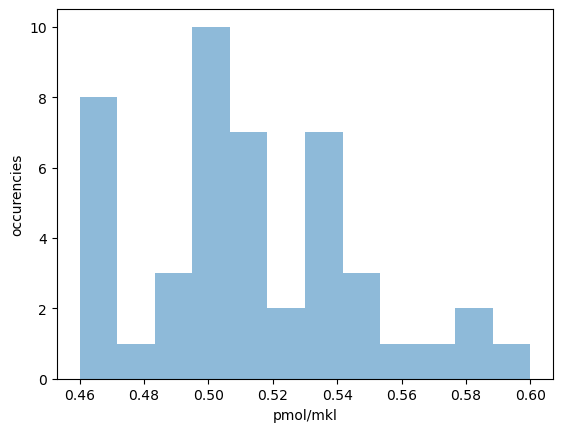

In [125]:
"""
смотрим распределение по корзинам
"""
ax = result['final conc, pmol/mkl'].plot.hist(bins=12, alpha=0.5)
ax.set_xlabel("pmol/mkl")
ax.set_ylabel("occurencies")

In [75]:
"""
Сравниваем 4 эксперимента - с выравниванием и без + эти два с очисткой на магнитных частицах
Как сравнивать? 
Можно ли одновременно на риалтаймнике?
"""

'\nСравниваем 4 эксперимента - с выравниванием и без + эти два с очисткой на магнитных частицах\nКак сравнивать? \nМожно ли одновременно на риалтаймнике?\n'

In [76]:
result

,where,Date,Sample Name,Nucleic Acid(ng/uL),A260/A280,A260/A230,A260,A280,Nucleic Acid Factor,Baseline Correction (nm),...,length,seq,monoisotopic_mass,pM/mkl,score,mkl,quantile,pmol,"final conc, pmol/mkl",target_well
0,A7,06.12.2023 9:57,Sample 1,400.464,2.013,1.519,12.135,6.028,33.0,340,...,#= 50,CTG ATA AAC CAC AAG ATA TCT ATG GTA TCG TTG CT...,15496.00,25.843056,True,7.0,5,180.901394,0.40,1
1,B7,06.12.2023 9:57,Sample 2,415.572,1.815,1.101,12.593,6.939,33.0,340,...,#= 58,CGT CTT CTG TAC CGC TAA TCA CAA GGT CAC GTA GT...,17631.34,23.570075,True,9.0,4,212.130672,0.47,1
2,C7,06.12.2023 9:58,Sample 3,382.936,2.130,1.130,11.604,5.447,33.0,340,...,#= 44,GAT TAG CGG TAC AGA AGA CGA GAT GCA AAC TCT CG...,13664.85,28.023432,True,6.0,6,168.140594,0.37,1
3,D7,06.12.2023 9:59,Sample 4,318.820,1.703,1.471,9.661,5.672,33.0,340,...,#= 45,AGA CGT TCA GTG ATT TCA CCA GTC TTC TTG TCT TC...,13798.86,23.104807,True,9.0,4,207.943265,0.46,1
4,E7,06.12.2023 9:59,Sample 5,386.471,1.744,1.496,11.711,6.715,33.0,340,...,#= 58,GGT GAA ATC ACT GAA CGT CTT GTG CTT GGT ACT CG...,17885.45,21.608123,True,12.0,3,259.297474,0.58,1
5,F7,06.12.2023 10:00,Sample 6,257.698,1.927,1.308,7.809,4.053,33.0,340,...,#= 45,AGT TAC TGA GCG AGT CAC ACC ATA TTC TAA CCA TT...,13797.90,18.676610,False,11.0,NaN,205.442712,0.46,1
6,G7,06.12.2023 10:01,Sample 7,413.148,1.825,1.408,12.520,6.859,33.0,340,...,#= 54,TGT GAC TCG CTC AGT AAC TAA ACG CTC AGT TAT GA...,16561.64,24.946080,True,7.0,5,174.622562,0.39,1
7,H7,06.12.2023 10:02,Sample 8,424.994,1.965,1.251,12.879,6.554,33.0,340,...,#= 49,CAA ACA CTT GGT CAG CAA AGC CAT ACT CTT TAG AG...,15026.70,28.282590,True,5.0,7,141.412952,0.31,1
8,I7,06.12.2023 10:02,Sample 9,469.346,1.913,1.413,14.223,7.436,33.0,340,...,#= 54,CTT TGC TGA CCA AGT GTT TGA AGA TAC TGT GAT GC...,16659.72,28.172502,True,5.0,7,140.862511,0.31,1
9,J7,06.12.2023 10:03,Sample 10,305.865,1.751,1.369,9.269,5.292,33.0,340,...,#= 38,CTC AGT GAA CAT TGC ACC TTT GCC ATT GTC GAT AG...,11619.48,26.323467,True,7.0,5,184.264270,0.41,1
